# Wine market study

The client, the Domaine des Croix is looking to define its bottles price for the American market. They retrieved a dataset of 130k wine bottles with their grape variety, country, production region, vintage (meaning the year of production), a description from an oenologist (wine specialist) and the price on the American market.

The goal will be to do a market analysis and to determine a way to fix the prices of the 14 bottles of your client.

## Datasets
- Dataset of 130k wines: https://github.com/murpi/wilddata/raw/master/wine.zip
- Dataset of the 14 wines of Domaine des Croix : https://github.com/murpi/wilddata/raw/master/domaine_des_croix.csv

Load the datasets.

In [1]:
# Connect to drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [2]:
# Find the .csv
downloaded = drive.CreateFile({'id': '1Xt1Zzj6gx3SbmokJ_7wgkRnNI5NAIY3L'})
downloaded.GetContentFile('wine_dataset.csv')

In [3]:
# Import 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud

!python3 -m spacy download en_core_web_md
import en_core_web_md
nlp = en_core_web_md.load()

from sklearn.preprocessing import LabelEncoder


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 96.4MB 1.3MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=057afb9801d38dc11903c659d6b2d45cc4d3f89069f990b4f23f0079241f71b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-t3wzbrp4/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [4]:
df_130k = pd.read_csv('wine_dataset.csv')
df_client = pd.read_csv("https://github.com/murpi/wilddata/raw/master/domaine_des_croix.csv")

### Screening of df_130k

In [5]:
df_130k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129957 non-null  int64  
 1   country                129894 non-null  object 
 2   description            129957 non-null  object 
 3   designation            92497 non-null   object 
 4   points                 129957 non-null  int64  
 5   price                  120964 non-null  float64
 6   province               129894 non-null  object 
 7   region_1               108710 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103713 non-null  object 
 10  taster_twitter_handle  98744 non-null   object 
 11  title                  129957 non-null  object 
 12  variety                129956 non-null  object 
 13  winery                 129957 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
df_130k.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df_130k.isna().sum()

country                     63
description                  0
designation              37460
points                       0
price                     8993
province                    63
region_1                 21247
region_2                 79446
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [8]:
df_130k.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129894,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129957,119942,"Ripe plum, game, truffle, leather and menthol ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92497,37975,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129957,NaN,NaN,NaN,88.4467,3.03948,80,86,88,91,100
price,120964,NaN,NaN,NaN,35.3584,41.0186,4,17,25,42,3300
province,129894,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108710,1228,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103713,19,Roger Voss,25500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98744,15,@vossroger,25500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Screening df_client

In [9]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14 non-null     int64  
 1   country                14 non-null     object 
 2   description            14 non-null     object 
 3   designation            9 non-null      object 
 4   points                 14 non-null     int64  
 5   price                  0 non-null      float64
 6   province               14 non-null     object 
 7   region_1               14 non-null     object 
 8   region_2               0 non-null      float64
 9   taster_name            14 non-null     object 
 10  taster_twitter_handle  14 non-null     object 
 11  title                  14 non-null     object 
 12  variety                14 non-null     object 
 13  winery                 14 non-null     object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.7+ KB


In [10]:
df_client.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df_client.isna().sum()

country                   0
description               0
designation               5
points                    0
price                    14
province                  0
region_1                  0
region_2                 14
taster_name               0
taster_twitter_handle     0
title                     0
variety                   0
winery                    0
dtype: int64

In [12]:
df_client.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,14,1,France,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,14,13,"A structured wine, packed with red fruits and ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,9,8,La Vigne au Saint,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,14,NaN,NaN,NaN,92.9286,1.85904,90,92,93.5,94,95
price,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,14,1,Burgundy,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,14,5,Beaune,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,14,1,Roger Voss,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,14,1,@vossroger,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_130k.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [14]:
df_client.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2012 Corton Grèves,Pinot Noir,Domaine des Croix
1,France,A rich wine with great fruits as well as struc...,La Vigne au Saint,94,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2013 La Vigne au Saint (Cor...,Pinot Noir,Domaine des Croix
2,France,"A perfumed village wine, this is made from fou...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2012 Beaune,Pinot Noir,Domaine des Croix
3,France,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2015 Beaune,Pinot Noir,Domaine des Croix
4,France,This wine is perfumed with cherries and red be...,Les Grèves Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2013 Les Grèves Premier Cru ...,Pinot Noir,Domaine des Croix


## Preprocessing
Instead of trying to predict the price, you will try to predict if the wine is "cheap" or "expensive". For this you will create a new column with these two classes. A wine is "cheap" if the price is less than the median, it's expensive otherwise.  

In [15]:
df_130k['cheap_price'] = 0
df_130k.shape

(129957, 14)

In [16]:
# Median price of wine
median_price = np.median(df_130k['price'].dropna())

# Create the column "cheap"
for row in range(df_130k.shape[0]):
  if df_130k.iloc[row, 4] > median_price:
    df_130k.iloc[row, 13] = 0
  elif df_130k.iloc[row, 4] <= median_price:
    df_130k.iloc[row, 13] = 1
  else: 
    df_130k.iloc[row, 13] = -1


In [17]:
df_130k['price'].describe()

count    120964.000000
mean         35.358363
std          41.018605
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [18]:
df_130k['cheap_price'].describe()

count    129957.000000
mean          0.402310
std           0.615515
min          -1.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: cheap_price, dtype: float64

## Market Analysis
The Domaine des Croix wants a descriptive analysis of the wine market specifically on the Pinot Noir variety. Propose one or two visualisations of your choice that you find relevant. You may use the tool of your choice (Python, Excel, PowerBI, Tableau, etc...).

In [19]:
df_pinot = df_130k[df_130k['variety'] == 'Pinot Noir']

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


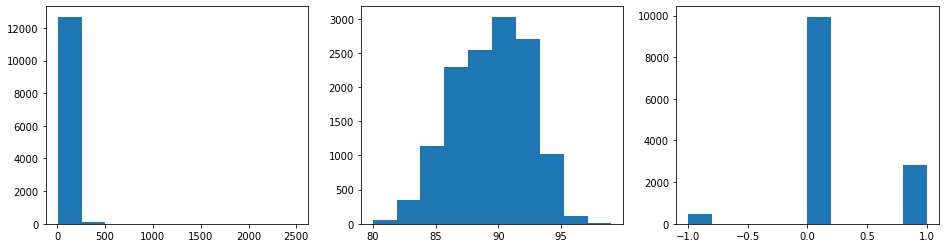

In [20]:
# Répartition du prix, des points et de l'indice de valeur 
fig, ax = plt.subplots(figsize = (16,4))
ax1 = plt.subplot(131)
ax1 = plt.hist(x = df_pinot['price'])

ax2 = plt.subplot(132)
ax2 = plt.hist(x = df_pinot['points'])

ax3 = plt.subplot(133)
ax3 = plt.hist(x = df_pinot['cheap_price'])

plt.show()

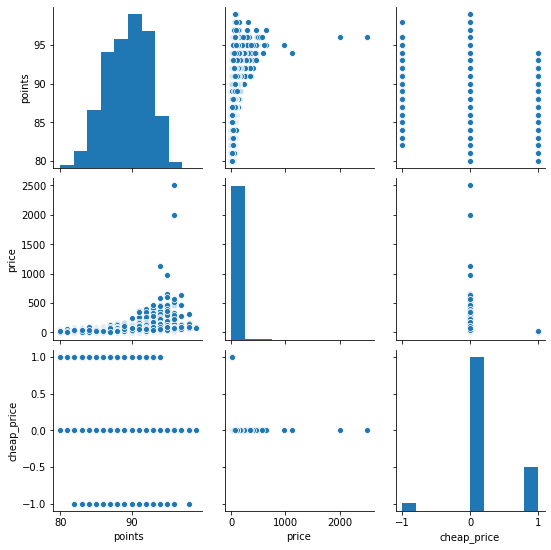

In [21]:
sns.pairplot(df_pinot)
plt.show()

## NLP
Do a word cloud of the most frequents words that are found in the wine descriptions.

In [22]:
# Create a corpus with all descriptions
corpus = []
df_pinot['description'].apply(lambda x : corpus.append(x))

4         None
21        None
25        None
35        None
41        None
          ... 
129906    None
129917    None
129922    None
129946    None
129953    None
Name: description, Length: 13259, dtype: object

In [23]:
# Tokenize and filtred stop words
corpus = " ".join(corpus)
tokenizer = RegexpTokenizer(r'\w+')
corpus = tokenizer.tokenize(corpus)

stop_words = set(stopwords.words('english')) 
filtered_corpus = [w for w in corpus if not w in stop_words] 

corpus = " ".join(filtered_corpus)
corpus

Output hidden; open in https://colab.research.google.com to view.

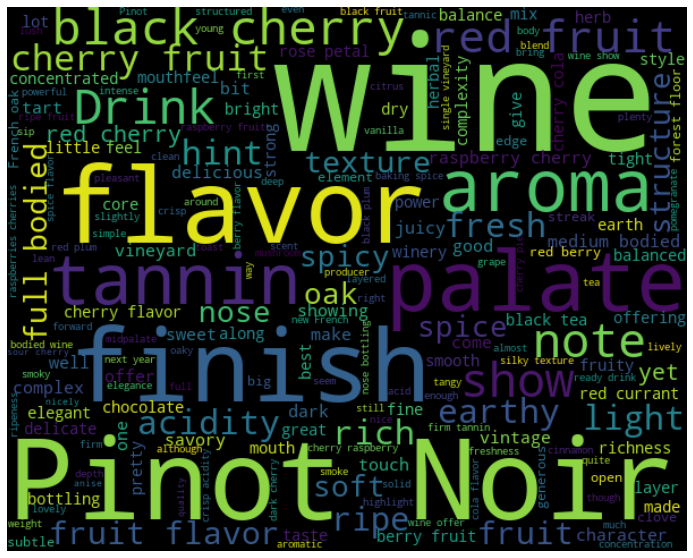

In [24]:
# Draw wordcloud
# Create the wordcloud object
wordcloud = WordCloud(width=600, height=480, margin=0).generate(corpus)
 
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Machine learning

Using the description of the wine, train a classifier that will predict if the wine is cheap or expensive. Train and evaluate your model, you should get at least 75% of accuracy. Then predict the class of your client's wines.




In [25]:
def PunkStopWordsExterm(sentence, output='sentence'):
  '''
  Exterminate punctuation and stop words of a sentence and return as a sentence
  or list of words. 

  :output: str : 'sentence' or 'words'
  'sentence'  would return the result as a sentence
  'words'     would return the result as a list of words
  '''
  # import nltk
  # nltk.download('stopwords')

  from nltk.corpus import stopwords
  from nltk.tokenize import RegexpTokenizer

  tokenizer = RegexpTokenizer(r'\w+')
  words = tokenizer.tokenize(sentence)

  stop_words = set(stopwords.words("english"))

  if output == 'sentence':
    return " ".join([w for w in words if not w in stop_words])
  elif output == 'words':
    return [w for w in words if not w in stop_words]
  else:
    Warning(
    print("Error : Wrong output format selected.", 
                   "Please chose between 'sentence' or 'words'!"))

In [26]:
# We clean and filter all the descriptions 
df_pinot['filtred_description'] = [PunkStopWordsExterm(sent, 'sentence') for sent in df_pinot['description']]
df_pinot.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,cheap_price,filtred_description
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,Much like regular bottling 2012 comes across r...
21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat,1,A sleek mix tart berry stem herb along hint oa...
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,0,Oak earth intermingle around robust aromas wet...
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,0,As many Erath 2010 vineyard designates strongl...
41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,1,A stiff tannic wine slowly opens brings brambl...


In [27]:
# Embeddind descriptions
df_pinot['embedding_sentence'] = [nlp(sent).vector for sent in df_pinot['filtred_description']]
df_pinot.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,cheap_price,filtred_description,embedding_sentence
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,Much like regular bottling 2012 comes across r...,"[-0.08592664, 0.13013157, -0.04177283, -0.0775..."
21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat,1,A sleek mix tart berry stem herb along hint oa...,"[-0.11350218, 0.15059276, -0.018604783, -0.158..."
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,0,Oak earth intermingle around robust aromas wet...,"[-0.10456012, 0.1208188, -0.08187118, -0.17301..."
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,0,As many Erath 2010 vineyard designates strongl...,"[-0.1343287, 0.16919115, -0.14661214, -0.10920..."
41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,1,A stiff tannic wine slowly opens brings brambl...,"[-0.11775816, 0.22760062, -0.069072045, -0.059..."


In [28]:
def EmbeddingMatrix(data):
  '''
  Cette fonction permet de transformer une liste matrice de liste DataFrame avec 
  autant de colonne que d'éléments dans la liste et autant de lignes que de 
  listes.
  e.g., 
      [1, 2, 3, 4, 5],
      [6, 7, 8, 9, 10]    (2, 1)

       | 0| 1| 2| 3| 4|
      0| 1| 2| 3| 4| 5|
      1| 6| 7| 8| 9|10|   (2, 5)
  '''
  
  import numpy as np

  df = pd.DataFrame(np.zeros((data.shape[0],300)))

  for col in range(len(data.iloc[0, 0])):
    for row in range(data.shape[0]):
      df.iloc[row, col] = data.iloc[row, 0][col]

  return df

In [29]:
X = EmbeddingMatrix(df_pinot[['embedding_sentence']])
X.shape

(13259, 300)

In [30]:
y = df_pinot['cheap_price']
y.shape

(13259,)

In [31]:
def LogRegModeling(X, y, rand_state=42, train_size=.8):

  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from sklearn.linear_model import LogisticRegression
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      random_state = rand_state, 
                                                      train_size = train_size)
  LogisticModel = LogisticRegression(max_iter=10000).fit(X_train, y_train)

  print("Model accuracy score on train set =", 
        LogisticModel.score(X_train, y_train))
  print("Model accuracy score on test set =", 
        LogisticModel.score(X_test, y_test))
  
  return LogisticModel

In [32]:
LogRModel = LogRegModeling(X, y, rand_state = 42)

Model accuracy score on train set = 0.8090883378900726
Model accuracy score on test set = 0.8012820512820513


# Machine Learning (optional) 

Use all your Machine Learning skills to predict the price of your client's wines the more precise possible. You may use the columns of your choice and every skill you learned (CrossValidation and GridSearch for example).

In [33]:
df_pinot = df_130k[df_130k['variety'] == 'Pinot Noir']

df_pinot.isna().sum()

country                     3
description                 0
designation              3375
points                      0
price                     482
province                    3
region_1                 1154
region_2                 4223
taster_name              2953
taster_twitter_handle    3166
title                       0
variety                     0
winery                      0
cheap_price                 0
dtype: int64

In [34]:
df_pinot = df_pinot.dropna(subset=['price', 'region_1', 'taster_name'])

In [35]:
df_pinot.isna().sum()

country                     0
description                 0
designation              2048
points                      0
price                       0
province                    0
region_1                    0
region_2                 2517
taster_name                 0
taster_twitter_handle     148
title                       0
variety                     0
winery                      0
cheap_price                 0
dtype: int64

In [36]:
df_pinot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8777 entries, 4 to 129953
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                8777 non-null   object 
 1   description            8777 non-null   object 
 2   designation            6729 non-null   object 
 3   points                 8777 non-null   int64  
 4   price                  8777 non-null   float64
 5   province               8777 non-null   object 
 6   region_1               8777 non-null   object 
 7   region_2               6260 non-null   object 
 8   taster_name            8777 non-null   object 
 9   taster_twitter_handle  8629 non-null   object 
 10  title                  8777 non-null   object 
 11  variety                8777 non-null   object 
 12  winery                 8777 non-null   object 
 13  cheap_price            8777 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+

In [37]:
df_pinot.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,8777,7,US,6962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,8777,8055,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,6729,2999,Reserve,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,8777,NaN,NaN,NaN,89.8711,2.93734,80,88,90,92,98
price,8777,NaN,NaN,NaN,51.6167,55.5257,5,30,45,60,2500
province,8777,24,California,4015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,8777,225,Willamette Valley,1436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,6260,17,Willamette Valley,2225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,8777,14,Paul Gregutt,2714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,8629,12,@paulgwine,2714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_pinot.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'cheap_price'],
      dtype='object')

In [39]:
le = LabelEncoder()

colNames = ['country', 'province', 'taster_name', 'region_1',
            'title', 'winery']

for col in colNames: 
  df_pinot[col] = le.fit_transform(df_pinot[col])

df_pinot.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,8777,NaN,NaN,NaN,5.31685,1.39228,0,6,6,6,6
description,8777,8055,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,6729,2999,Reserve,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,8777,NaN,NaN,NaN,89.8711,2.93734,80,88,90,92,98
price,8777,NaN,NaN,NaN,51.6167,55.5257,5,30,45,60,2500
province,8777,NaN,NaN,NaN,7.91227,5.55935,0,4,4,15,23
region_1,8777,NaN,NaN,NaN,133.793,70.3966,0,73,161,186,224
region_2,6260,17,Willamette Valley,2225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,8777,NaN,NaN,NaN,9.06312,2.79848,0,7,9,10,13
taster_twitter_handle,8629,12,@paulgwine,2714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_pinot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8777 entries, 4 to 129953
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                8777 non-null   int64  
 1   description            8777 non-null   object 
 2   designation            6729 non-null   object 
 3   points                 8777 non-null   int64  
 4   price                  8777 non-null   float64
 5   province               8777 non-null   int64  
 6   region_1               8777 non-null   int64  
 7   region_2               6260 non-null   object 
 8   taster_name            8777 non-null   int64  
 9   taster_twitter_handle  8629 non-null   object 
 10  title                  8777 non-null   int64  
 11  variety                8777 non-null   object 
 12  winery                 8777 non-null   int64  
 13  cheap_price            8777 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.0+ 

In [41]:
df_model = df_pinot.select_dtypes(exclude=object)
df_model = df_model.drop('cheap_price', axis = 1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8777 entries, 4 to 129953
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      8777 non-null   int64  
 1   points       8777 non-null   int64  
 2   price        8777 non-null   float64
 3   province     8777 non-null   int64  
 4   region_1     8777 non-null   int64  
 5   taster_name  8777 non-null   int64  
 6   title        8777 non-null   int64  
 7   winery       8777 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 617.1 KB


### Test with linear regression 

In [42]:
def Iterative_LinearRegression_modeling(data, target, mods=False, screening=False):

  '''
  Cette fonction effectue une modélisation de la meilleure régression linéaire
  en fonction des variables du dataset et revoi le model qui obtien les meilleurs
  scores. 
  '''

  if mods:  # Import de module si nécessaire
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

  # Sélection des colonnes qui ne sont pas de type 'object'
  obj = data.columns[data.dtypes.values == np.dtype("object")]
  colNames = [x for x in data.columns if x not in obj]

  # Création d'un dictionnaire avec les variables les plus corrélées à la target
  df_corr = data[colNames].corr()
  dictCorr = dict(df_corr[target])
  del dictCorr[target]

  dictCorr = sorted(dictCorr.items(), key = lambda x : x[1])
  dictCorr.reverse()

  # Variables pour boucle
  cols = []
  train_score_max = 0
  test_score_max = 0
  Xcols = []

  # Début de la boucle de modélisation en partant de la plus forte corrélation
  for x, r in dictCorr:
    cols.append(x)    # Ajout d'une nouvelle variable au model
    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                        train_size = 0.75)

    LRmodel = LinearRegression().fit(X_train, y_train)
    
    train_score = LRmodel.score(X_train, y_train)
    test_score = LRmodel.score(X_test, y_test)

    if test_score > test_score_max:   # Si la nouvelle variable augmente le score, 
      test_score_max = test_score     # on met à jour les variables max
      train_score_max = train_score
      Xcolumns = cols
    else:
      cols.remove(x)                  # Sinon on le retire du modèle.
    

  # Print du mini compte rendu
  if screening:
    if len(Xcolumns) > 1:
      print('Best scores obtained with {} variables :'.format(len(Xcolumns)))
    else:
      print('Best scores obtained with {} variable :'.format(len(Xcolumns)))
    
    for col in Xcolumns:
      print("   ",col)

    print('\nTrain score =', train_score_max)
    print('Test score =', test_score_max)

  # Fit un nouveau model avec les meilleures variables
  Xmax = data[Xcolumns]
  X_train, X_test, y_train, y_test = train_test_split(Xmax, y, random_state=42, 
                                                      train_size = 0.75)
  
  LRmodelMax = LinearRegression().fit(X_train, y_train)

  # Retourne le meilleur model.
  return LRmodelMax, Xcolumns

In [43]:
LRModel, lrXcol = Iterative_LinearRegression_modeling(df_model, 'price', mods=True, screening=True)

Best scores obtained with 7 variables :
    points
    taster_name
    winery
    title
    region_1
    province
    country

Train score = 0.1820280909533456
Test score = 0.24486422022812157


### Test with kNN regression 

In [44]:
def kNNregression_modeling(data, target, kmax=2, k_fold=5, screening=True):
  '''
  The aim of this function is to fine-tune a knn regression model with a cross validation.    
  
  :param data: DataFrame
  :param target: y
  :param k_fold: number of split for the cross validation
  :param screening: Do you want a print of the scores
  :return: Return the fitted model and the columns used
  '''
  ##### IMPORT
  import numpy as np
  import pandas as pd
  
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.metrics import make_scorer, r2_score
  from sklearn.model_selection import cross_val_score, StratifiedKFold

  ##### COLUMNS SELECTIONS
  # Sélection des colonnes qui ne sont pas de type 'object'
  obj = data.columns[data.dtypes.values == np.dtype("object")]
  colNames = [x for x in data.columns if x not in obj]

  # Création d'un dictionnaire avec les variables les plus corrélées à la target
  df_corr = data[colNames].corr()
  dictCorr = dict(df_corr[target])
  del dictCorr[target]

  dictCorr = sorted(dictCorr.items(), key = lambda x : x[1])
  dictCorr.reverse()

  ##### BOUCLE D'ENTRAINEMENT DU MODEL
  # Variables
  cols = []
  score_max = 0
  scores_max = 0
  scores_max_k = 0
  score_max_k = 0
  scores_max_k = 0
  Xcolumns = []

  # Début de la boucle de modélisation en partant de la plus forte corrélation
  for x, r in dictCorr:
    cols.append(x)    # Ajout d'une nouvelle variable au model
    X = data[cols]
    y = data[target]

    print('_________________________')
    print('Test with {} colunm(s) [{} column(s)]'.format(cols, len(cols)))

    for k in range(1, kmax):
      print('For k =', k)
      cv =  StratifiedKFold(n_splits = k_fold, random_state = 42, shuffle = True)
      scores = cross_val_score(KNeighborsRegressor(n_neighbors = k), X, y, cv=cv,
                                      scoring = make_scorer(r2_score))

      print("Mean R² =", np.mean(scores))
      print("with R²:", scores)
      print('---')

      if np.mean(scores) > score_max_k:     # Si le k augmente le score,
        score_max_k = np.mean(scores)     # on met à jour les variables
        scores_max_k = scores
        Xcolumns = cols
        bestK = k
    
    if score_max_k > score_max:
      score_max = score_max_k
      scores_max = scores_max_k
      Xcolumns = cols
      maxK = bestK
    else:
      cols.remove(x)
    print("\n\n")
    print("Actual best model results with {} neighbors".format(maxK))
    print("\nMean R² =", score_max)
    print("with R²:", scores_max)
    print('_________________________')


  ### SCREENING
  # Print du mini compte rendu
  if screening:
    print('####################')
    print('\nFinal Results:')
    if len(Xcolumns) > 1:
      print('Best R² obtained with k = {} and {} variables :'.format(maxK, len(Xcolumns)))
    else:
      print('Best R² obtained with k = {} and {} variable :'.format(maxK, len(Xcolumns)))

    for col in Xcolumns:
      print("   ",col)

    print('\nMean R² =', score_max)
    print('with R² list:', scores_max)
    print('\n####################')

  # Fit un nouveau model avec les meilleures variables
  from sklearn.model_selection import train_test_split
  Xmax = data[Xcolumns]
  X_train, X_test, y_train, y_test = train_test_split(Xmax, y, random_state=42,
                                                        train_size = 0.75)
  modelMax = KNeighborsRegressor(n_neighbors = maxK).fit(X_train, y_train)

  # Retourne le meilleur model.
  return modelMax, Xcolumns


In [45]:
Model, Xcol = kNNregression_modeling(df_model, 'price', kmax=11, k_fold=5, screening=True)

_________________________
Test with ['points'] colunm(s) [1 column(s)]
For k = 1
Mean R² = -0.8810618481370465
with R²: [-3.25693162  0.08965622  0.04473624 -0.49460985 -0.78816023]
---
For k = 2


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = -0.5573344624127061
with R²: [-0.86898674 -1.95396696  0.06668782  0.06324322 -0.09364966]
---
For k = 3
Mean R² = -0.1410610667612373
with R²: [-0.23494885 -0.58769814 -0.11354047  0.13901814  0.09186399]
---
For k = 4


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = -0.023538688477143223
with R²: [-0.13486529 -0.15618045 -0.06212645  0.10342851  0.13205024]
---
For k = 5
Mean R² = 0.01837245201670925
with R²: [-0.06460187  0.02430665 -0.13696829  0.11579144  0.15333433]
---
For k = 6


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.05911358159956896
with R²: [ 0.02257146  0.11792574 -0.19462603  0.17427627  0.17542047]
---
For k = 7
Mean R² = 0.09163502665005027
with R²: [ 0.09327982  0.15787401 -0.19703484  0.20789592  0.19616022]
---
For k = 8


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.11703981872184692
with R²: [ 0.16260383  0.1495163  -0.16746986  0.21490273  0.22564611]
---
For k = 9
Mean R² = 0.1326129158293651
with R²: [ 0.15682904  0.16601044 -0.10349401  0.22444893  0.21927017]
---
For k = 10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.1463084847136174
with R²: [ 0.19169431  0.15634432 -0.04362101  0.21643276  0.21069204]
---



Actual best model results with 10 neighbors

Mean R² = 0.1463084847136174
with R²: [ 0.19169431  0.15634432 -0.04362101  0.21643276  0.21069204]
_________________________
_________________________
Test with ['points', 'taster_name'] colunm(s) [2 column(s)]
For k = 1
Mean R² = 0.25243465693652206
with R²: [0.33708353 0.29854212 0.11414492 0.30314679 0.20925592]
---
For k = 2
Mean R² = 0.28857638679704267
with R²: [0.20294459 0.27080992 0.20660284 0.36746996 0.39505462]
---
For k = 3


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.3207388099290277
with R²: [0.40372608 0.31603965 0.23515776 0.22272911 0.42604145]
---
For k = 4
Mean R² = 0.3741975655689297
with R²: [0.50121433 0.37696689 0.25307641 0.29196811 0.44776209]
---
For k = 5
Mean R² = 0.3929695915725352
with R²: [0.46884599 0.36465739 0.2894097  0.36818016 0.47375472]
---
For k = 6


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.411670294337284
with R²: [0.47047093 0.3811516  0.30449817 0.40994149 0.49228928]
---
For k = 7
Mean R² = 0.3811004104324486
with R²: [0.41137763 0.37373612 0.30765412 0.31880143 0.49393275]
---
For k = 8
Mean R² = 0.4029466843175
with R²: [0.45883024 0.3649853  0.31163488 0.33882866 0.54045433]
---
For k = 9


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.4362603463269187
with R²: [0.46441559 0.47191913 0.33025045 0.37374538 0.54097118]
---
For k = 10
Mean R² = 0.4404727519694399
with R²: [0.47775635 0.46778343 0.32677443 0.40626325 0.5237863 ]
---



Actual best model results with 10 neighbors

Mean R² = 0.4404727519694399
with R²: [0.47775635 0.46778343 0.32677443 0.40626325 0.5237863 ]
_________________________
_________________________
Test with ['points', 'taster_name', 'winery'] colunm(s) [3 column(s)]
For k = 1
Mean R² = 0.4532825072242492
with R²: [0.26842179 0.70412409 0.36763356 0.46965868 0.45657441]
---
For k = 2


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.6415901835742158
with R²: [0.55029923 0.8214435  0.62374817 0.61805456 0.59440545]
---
For k = 3
Mean R² = 0.6057262309951955
with R²: [0.56582582 0.71861666 0.58512149 0.55240457 0.60666262]
---
For k = 4
Mean R² = 0.5879754533674381
with R²: [0.580103   0.67510873 0.47755816 0.62526053 0.58184685]
---
For k = 5
Mean R² = 0.5666417853157574
with R²: [0.55447346 0.62993864 0.45499364 0.61645423 0.57734896]
---
For k = 6


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.551397435564913
with R²: [0.56436399 0.59190542 0.42021289 0.59861315 0.58189172]
---
For k = 7
Mean R² = 0.5322582358419404
with R²: [0.56106954 0.56130508 0.40084468 0.56460403 0.57346786]
---
For k = 8
Mean R² = 0.5116785774360935
with R²: [0.56266882 0.5115006  0.38102819 0.55773508 0.54546021]
---
For k = 9


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.4989720562779933
with R²: [0.5531346  0.49985669 0.37773521 0.5403856  0.52374818]
---
For k = 10
Mean R² = 0.48645275046997644
with R²: [0.54284497 0.48919699 0.36501697 0.51986854 0.51533628]
---



Actual best model results with 2 neighbors

Mean R² = 0.6415901835742158
with R²: [0.55029923 0.8214435  0.62374817 0.61805456 0.59440545]
_________________________
_________________________
Test with ['points', 'taster_name', 'winery', 'title'] colunm(s) [4 column(s)]
For k = 1
Mean R² = 0.49860551944727993
with R²: [0.31136562 0.63588704 0.60043225 0.41963928 0.52570341]
---
For k = 2


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.5052391934944015
with R²: [-0.01255688  0.77780019  0.65662878  0.54064755  0.56367633]
---
For k = 3
Mean R² = 0.404870803922444
with R²: [-0.32824992  0.70194227  0.62058443  0.4985991   0.53147814]
---
For k = 4
Mean R² = 0.4192751262248756
with R²: [-0.09625788  0.62677327  0.54729604  0.54227177  0.47629243]
---
For k = 5


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.42598004478239576
with R²: [0.11195349 0.56666347 0.476955   0.53490625 0.43942201]
---
For k = 6
Mean R² = 0.4114000711388249
with R²: [0.17414322 0.50297524 0.43314047 0.51269387 0.43404755]
---
For k = 7
Mean R² = 0.3587924194401351
with R²: [0.07279142 0.45844505 0.39052622 0.49821468 0.37398472]
---
For k = 8


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.3439419599590069
with R²: [0.11021097 0.42892371 0.35361771 0.46237393 0.36458349]
---
For k = 9
Mean R² = 0.342654671080591
with R²: [0.1735379  0.40493864 0.3320857  0.44817537 0.35453574]
---
For k = 10
Mean R² = 0.3384065636445348
with R²: [0.22378449 0.38528614 0.31294903 0.418906   0.35110716]
---



Actual best model results with 2 neighbors

Mean R² = 0.6415901835742158
with R²: [0.55029923 0.8214435  0.62374817 0.61805456 0.59440545]
_________________________
_________________________
Test with ['points', 'taster_name', 'winery', 'region_1'] colunm(s) [4 column(s)]
For k = 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.5265708694025422
with R²: [0.50025542 0.73930335 0.82787046 0.34789361 0.2175315 ]
---
For k = 2
Mean R² = 0.5866236080515345
with R²: [0.51355022 0.80063548 0.78380402 0.40131534 0.43381298]
---
For k = 3
Mean R² = 0.5610291498342519
with R²: [0.45332034 0.70355739 0.62630299 0.5601556  0.46180942]
---
For k = 4


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.5152940307370211
with R²: [0.42765846 0.62562484 0.52046888 0.54839907 0.4543189 ]
---
For k = 5
Mean R² = 0.46600882680700567
with R²: [0.38285287 0.56168057 0.45293966 0.51692415 0.41564688]
---
For k = 6
Mean R² = 0.42406751442292323
with R²: [0.37849874 0.50421094 0.398506   0.48768859 0.3514333 ]
---
For k = 7


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.3869089576292587
with R²: [0.33725696 0.45548721 0.35554527 0.46768003 0.31857533]
---
For k = 8
Mean R² = 0.36061448555642917
with R²: [0.29921871 0.42576209 0.32153383 0.43488356 0.32167423]
---
For k = 9
Mean R² = 0.3374398973138872
with R²: [0.26649694 0.39556265 0.30240667 0.40247391 0.32025932]
---
For k = 10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.3225800986025023
with R²: [0.26712559 0.37091395 0.27416858 0.38105533 0.31963704]
---



Actual best model results with 2 neighbors

Mean R² = 0.6415901835742158
with R²: [0.55029923 0.8214435  0.62374817 0.61805456 0.59440545]
_________________________
_________________________
Test with ['points', 'taster_name', 'winery', 'province'] colunm(s) [4 column(s)]
For k = 1
Mean R² = 0.45664418198613105
with R²: [0.21506542 0.71026132 0.38154957 0.50915649 0.46718811]
---
For k = 2
Mean R² = 0.6373975533249985
with R²: [0.49246441 0.81713614 0.62941188 0.64364627 0.60432906]
---
For k = 3


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.6169043865180307
with R²: [0.56272963 0.71988362 0.58754089 0.60060129 0.6137665 ]
---
For k = 4
Mean R² = 0.5950175629541358
with R²: [0.58191445 0.6778628  0.49924419 0.63459419 0.58147219]
---
For k = 5
Mean R² = 0.5692370816955928
with R²: [0.56184158 0.63217877 0.46514287 0.61503057 0.57199162]
---
For k = 6


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.5559416415286996
with R²: [0.57232068 0.59188927 0.42992188 0.60298185 0.58259453]
---
For k = 7
Mean R² = 0.5385624051992965
with R²: [0.56845202 0.55787843 0.41223549 0.57288123 0.58136486]
---
For k = 8
Mean R² = 0.5129947356437443
with R²: [0.55658032 0.51031737 0.38712716 0.55389777 0.55705105]
---
For k = 9


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.5008616672346757
with R²: [0.55292209 0.49755818 0.37445541 0.53843277 0.54093989]
---
For k = 10
Mean R² = 0.48900716135834676
with R²: [0.54427327 0.48605355 0.36229351 0.52154254 0.53087294]
---



Actual best model results with 2 neighbors

Mean R² = 0.6415901835742158
with R²: [0.55029923 0.8214435  0.62374817 0.61805456 0.59440545]
_________________________
_________________________
Test with ['points', 'taster_name', 'winery', 'country'] colunm(s) [4 column(s)]
For k = 1
Mean R² = 0.45468501064851025
with R²: [0.26594352 0.7068127  0.36805509 0.47176786 0.46084588]
---
For k = 2


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.64416812005057
with R²: [0.55069163 0.82195546 0.62183511 0.62175034 0.60460805]
---
For k = 3
Mean R² = 0.6090435551248714
with R²: [0.56596044 0.72096073 0.58292466 0.55894386 0.6164281 ]
---
For k = 4
Mean R² = 0.5909340267099505
with R²: [0.58233873 0.67916844 0.47597732 0.63046402 0.58672163]
---
For k = 5


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.5709216450841994
with R²: [0.5659435  0.63328299 0.45623244 0.61829579 0.58085351]
---
For k = 6
Mean R² = 0.5560833845447284
with R²: [0.57380404 0.5984872  0.42165547 0.60291737 0.58355285]
---
For k = 7
Mean R² = 0.5408837679107276
with R²: [0.57688395 0.56397696 0.40432266 0.57804108 0.58119418]
---
For k = 8


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean R² = 0.519389261624432
with R²: [0.57660323 0.51484863 0.3831475  0.56431648 0.55803046]
---
For k = 9
Mean R² = 0.5067270917801115
with R²: [0.56336096 0.50260369 0.38086868 0.5425462  0.54425594]
---
For k = 10
Mean R² = 0.4951604805284903
with R²: [0.55620021 0.49069302 0.36649456 0.52714558 0.53526904]
---



Actual best model results with 2 neighbors

Mean R² = 0.64416812005057
with R²: [0.55069163 0.82195546 0.62183511 0.62175034 0.60460805]
_________________________
####################

Final Results:
Best R² obtained with k = 2 and 4 variables :
    points
    taster_name
    winery
    country

Mean R² = 0.64416812005057
with R² list: [0.55069163 0.82195546 0.62183511 0.62175034 0.60460805]

####################


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


### Model choice : 
> **kNN regression** as the bests results

In [46]:
colNames = ['country', 'province', 'taster_name', 'region_1',
            'title', 'winery']

for col in colNames: 
  df_client[col] = le.fit_transform(df_client[col])

X_client = df_client[Xcol]

df_client['predicted_price'] = Model.predict(X_client)
df_client['predicted_price']

0     29.0
1     29.0
2     29.0
3     29.0
4     29.0
5     29.0
6     29.0
7     29.0
8     29.0
9     29.0
10    29.0
11    29.0
12    29.0
13    29.0
Name: predicted_price, dtype: float64

# Business Intelligence tools
Use PowerBI or Tableau Software to create a dashboard with at least :
- one choropleth **world map** chart. Each country will be colorized with the points average.
- one **column bar** chart, with each variety, and number of tested wines.

We'll be able to click on one chart to filter the other chart.

You can add other charts if you think it's useful for the analysis. You can help you [with this file](https://github.com/murpi/wilddata/raw/master/wine_pivottable.csv) to make this dashboard. But if you want to add some other informations, feel free to export some datas from the initial dataset.

**Remember to publish the link to your dashboard here !**

Below, an example of the expected dashboard :

![Dashboard 1](https://github.com/murpi/wilddata/raw/master/checkpoint3_1.png)
![Dashboard 1](https://github.com/murpi/wilddata/raw/master/checkpoint3_2.png)



### Remember to publish the link to your dashboard here :

> J'ai un soucis de licence avec power BI, du coup **je ne peux pas publier mon dashboard**... Je t'ai fait des captures d'écran, j'espère que ça ira.. 

# World Map
![WorldMap](https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Odyssey/Checkpoint/%233/WorldMapDashboard.png)

# Bart Chart
![BartChart](https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Odyssey/Checkpoint/%233/BarChartDashboard.png)

# Price Repartion
![PriceRepart](https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Odyssey/Checkpoint/%233/PriceRepartDashboard.png)